## Demo of filter


This notebook demonstrates the use of the Kalman filter.

Contents:

1. Canonical Example

2. Likelihood curves

## Setup 


First lets quickly set up some bits

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import sys
# Hacky way to add higher directory to python modules path. 
# Means that I dont have to make src/ a proper python package
try:
    sys.path.remove("../src") 
except:
    pass
sys.path.append("../src") 

## 1. Canonical example 

This is effectively the same steps that are taken by `main.py`


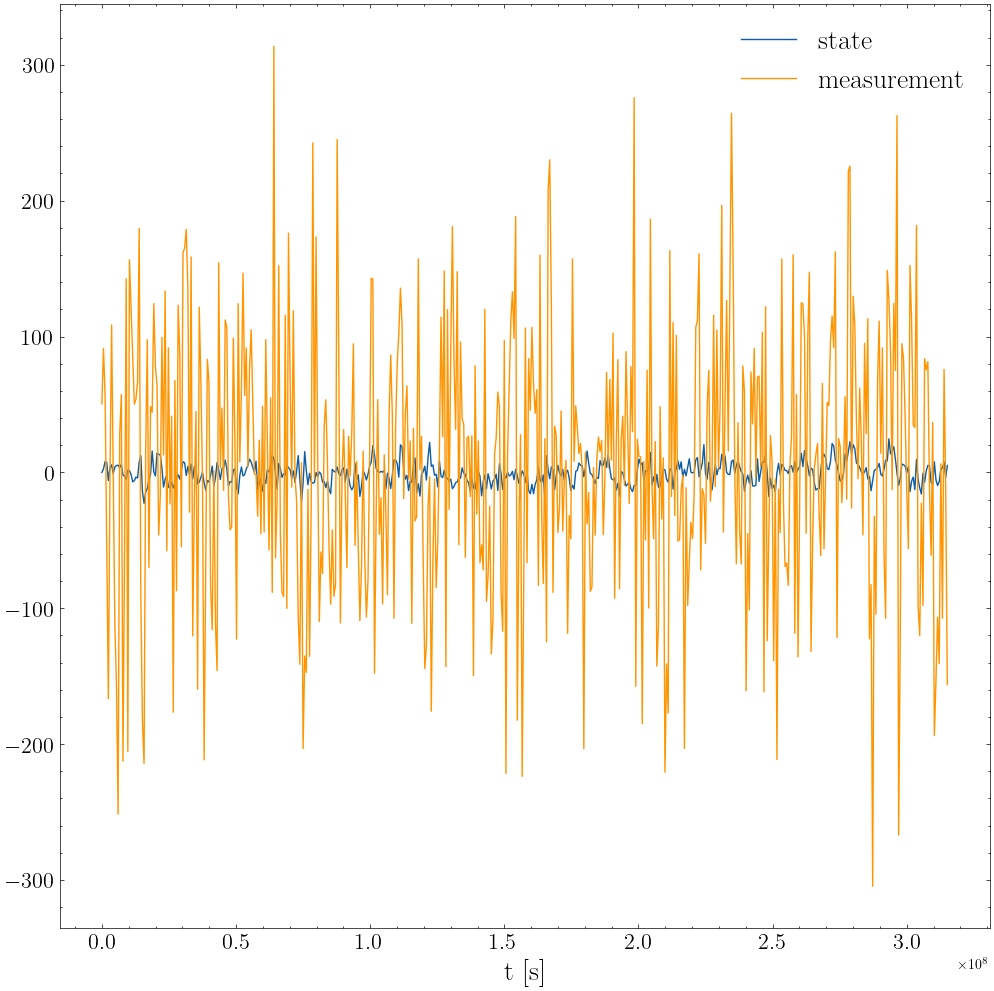

In [20]:
from system_parameters import BrownianMotionParameters
from pulsars import Pulsars
from synthetic_data import ScalarBrownianMotion
from model import KalmanBrownianMotion
from kalman_filter import KalmanFilter
from priors import bilby_priors_dict

import numpy as np 

#Setup and create some synthetic data
P    = BrownianMotionParameters(cadence=7,T=10,γ=1e-6,σp=1e-2,σm=100.0)    # System parameters read from config file
data = ScalarBrownianMotion(P)
data.plot(plot_points=False)




In [21]:
from model import KalmanBrownianMotion
# #Define the model to be used by the Kalman Filter
model = KalmanBrownianMotion(P.dt, N_states=1)




-3133.5597123710095


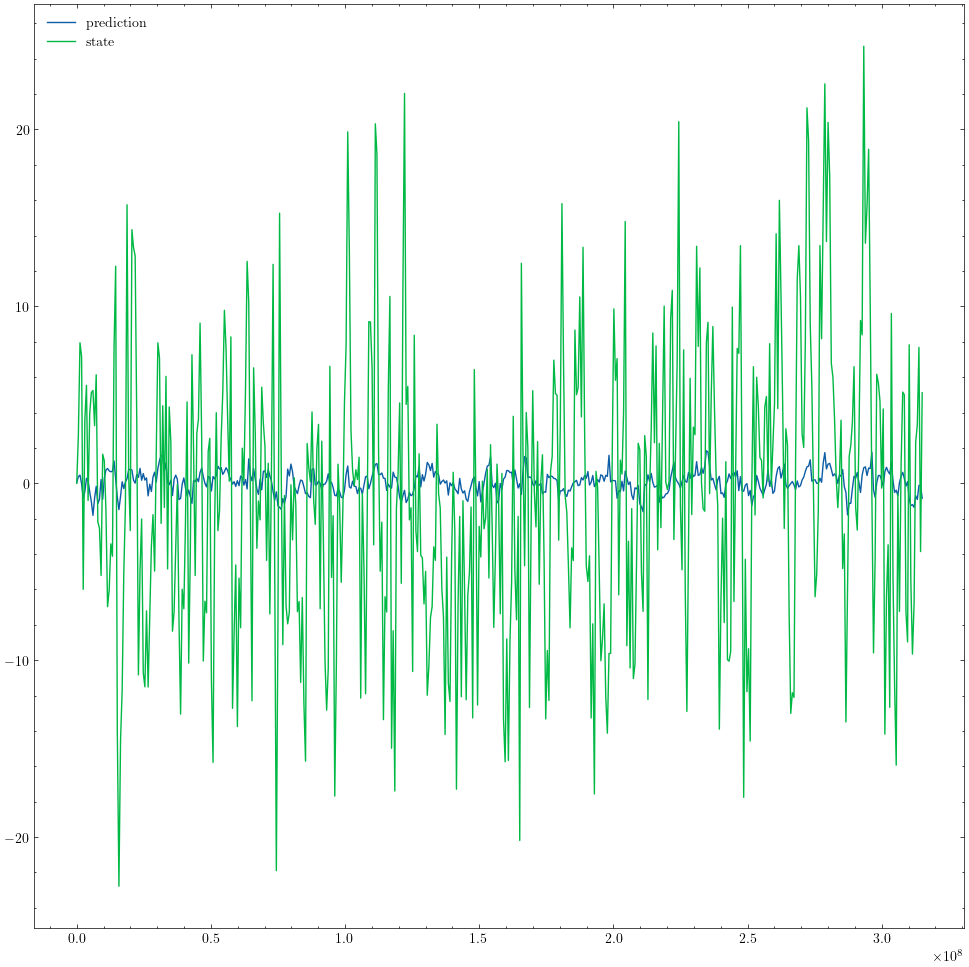

In [29]:
#Initialise the Kalman filter

from priors import bilby_priors_dict
from kalman_filter import KalmanFilter 
#Run the KF using the same parameters used to generate the synthetic data
init_parameters,optimal_parameters_dict = bilby_priors_dict(P)
optimal_parameters                      = optimal_parameters_dict.sample(1)  




KF = KalmanFilter(model,data)




KF.run(optimal_parameters)

print(KF.ll) 


import matplotlib.pyplot as plt 
plt.figure(figsize=(12,12))
plt.plot(P.t, KF.state_predictions,label='prediction')
plt.plot(P.t, data.state,label='state')
plt.legend()
#plt.plot(P.t, data.measurement - KF.measurement_predictions)


# #We get the correct parameters via Bilby dictionary, looking towards when we will run this with nested sampling
# init_parameters,optimal_parameters_dict = bilby_priors_dict(PTA,P,set_state_parameters_as_known=True,set_measurement_parameters_as_known=True)
# 
